In [1]:
# 1. Dataset & Libraries Setup

# Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
#2. Data Preprocessing
# Load the dataset
df = pd.read_csv("EastWestAirlines.csv")

# Check for nulls
df.isnull().sum()

# Impute or drop missing values
df = df.dropna()

# Outlier removal (optional: Z-score or IQR method)
from scipy import stats
z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z < 3).all(axis=1)]

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=np.number))

               ID#        Balance   Qual_miles    cc1_miles  cc2_miles  \
count  3630.000000    3630.000000  3630.000000  3630.000000     3630.0   
mean   2043.135813   60519.392562    39.584573     1.997245        1.0   
std    1156.308525   61882.862343   249.199005     1.319875        0.0   
min       1.000000       0.000000     0.000000     1.000000        1.0   
25%    1054.250000   17481.000000     0.000000     1.000000        1.0   
50%    2054.500000   39220.000000     0.000000     1.000000        1.0   
75%    3041.750000   82121.500000     0.000000     3.000000        1.0   
max    4021.000000  370941.000000  2454.000000     5.000000        1.0   

       cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count     3630.0   3630.000000  3630.000000        3630.000000   
mean         1.0  14299.180716    10.464187         255.907438   
std          0.0  18134.266531     8.251370         636.954758   
min          1.0      0.000000     0.000000           0.000000   
25%

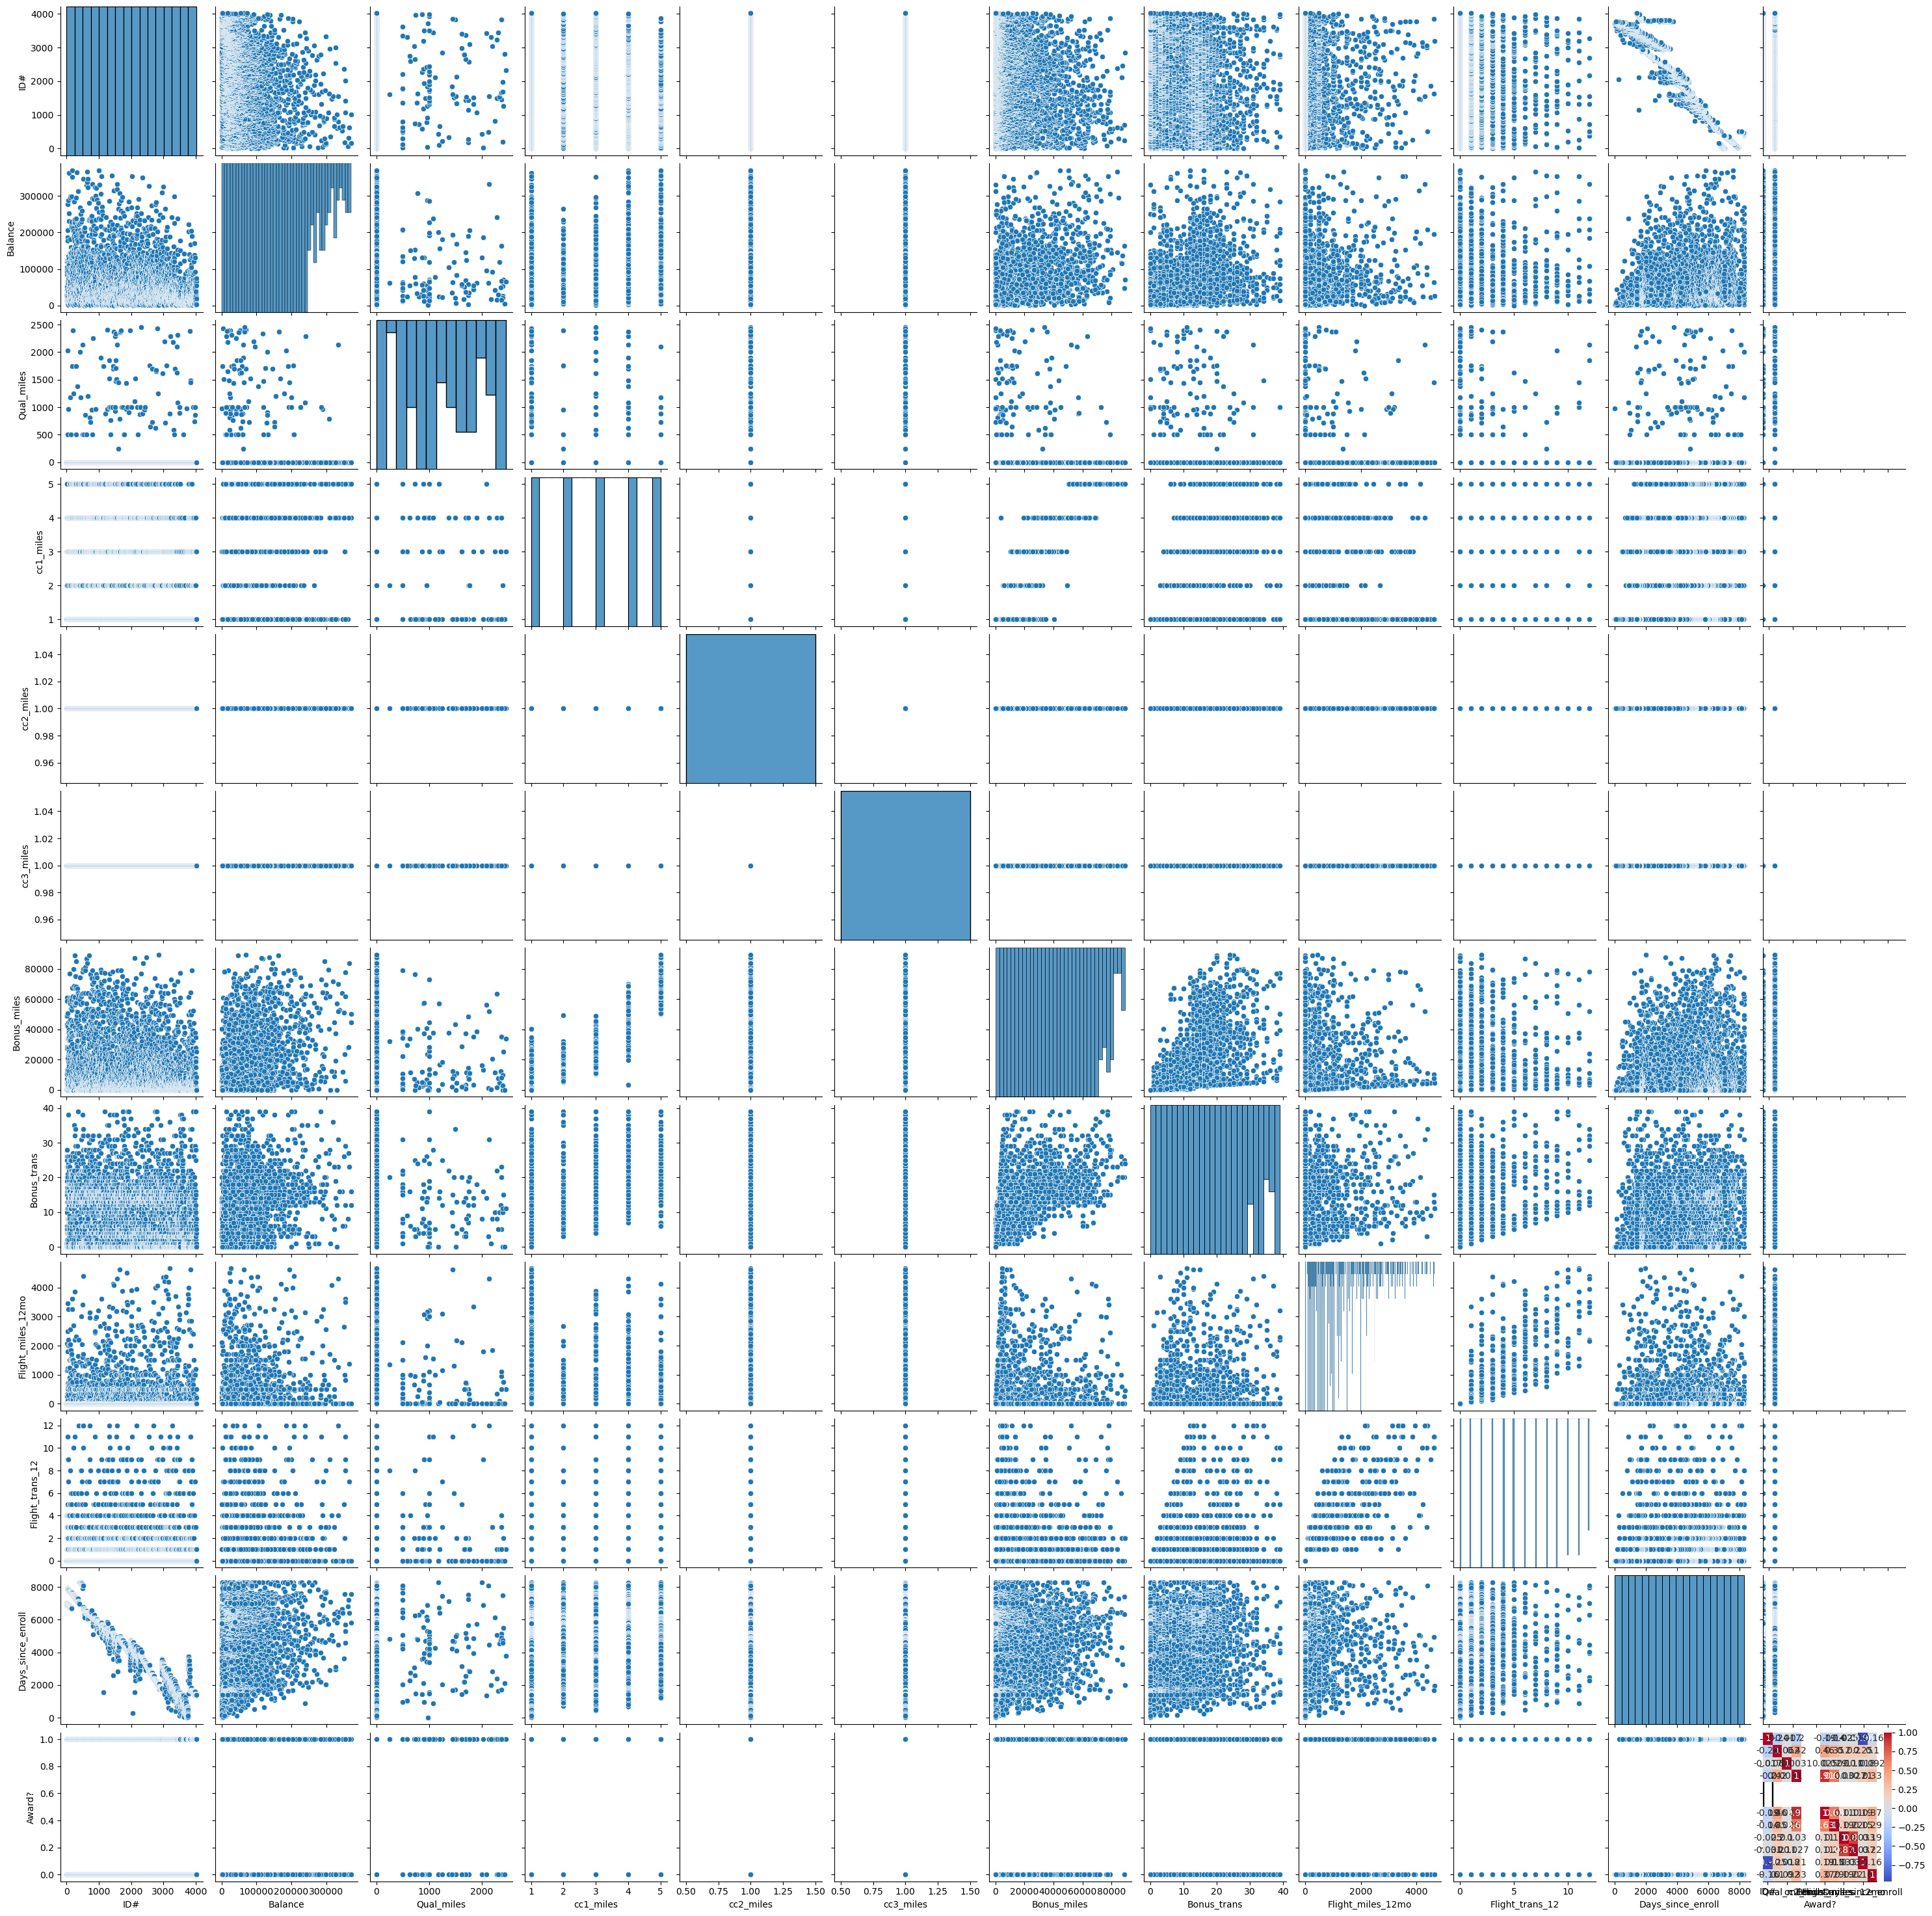

In [7]:
#3. Exploratory Data Analysis (EDA)
# Summary stats
print(df.describe())

# Pair plot
sns.pairplot(df)

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

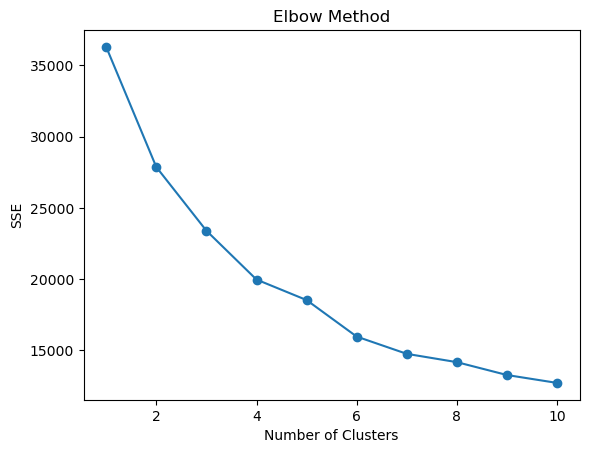

In [8]:
#4. K-Means Clustering
#Elbow Method to find optimal K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

In [9]:
#Fit & Evaluate
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

print("KMeans Silhouette Score:", silhouette_score(scaled_data, kmeans_labels))


KMeans Silhouette Score: 0.29192710837860614


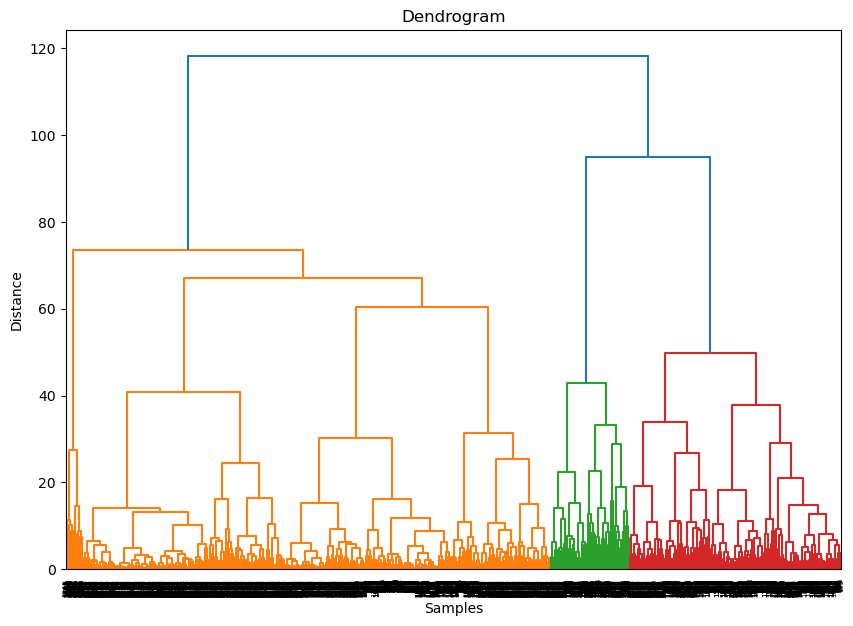

In [10]:
#5. Hierarchical Clustering
#Dendrogram
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [16]:
#Fit & Evaluate
from sklearn.cluster import AgglomerativeClustering

# Use 'metric' instead of 'affinity'
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_data)

print("Hierarchical Clustering Silhouette Score:", silhouette_score(scaled_data, hc_labels))


Hierarchical Clustering Silhouette Score: 0.26359050526851413


In [17]:
#6. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Filter noise points (-1)
filtered_labels = dbscan_labels[dbscan_labels != -1]
filtered_data = scaled_data[dbscan_labels != -1]

if len(set(filtered_labels)) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(filtered_data, filtered_labels))
else:
    print("DBSCAN did not form meaningful clusters.")

DBSCAN Silhouette Score: -0.27974481353425573


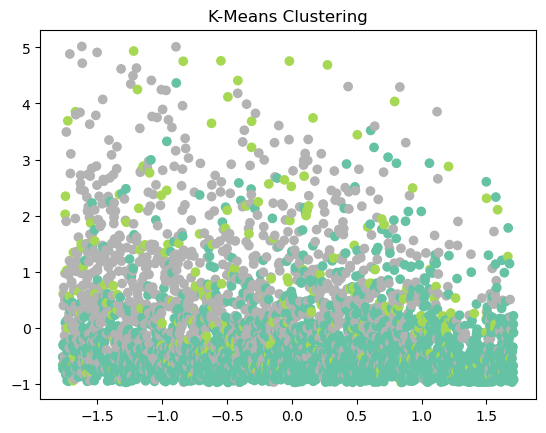

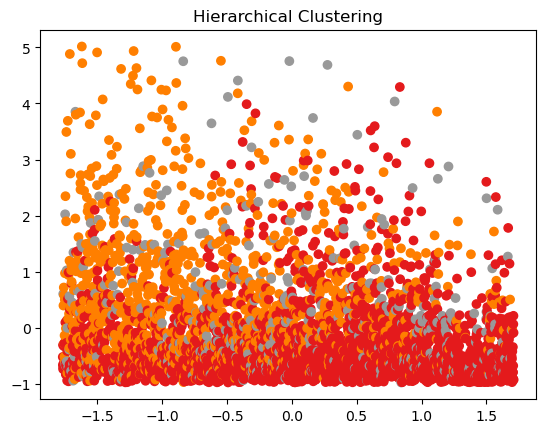

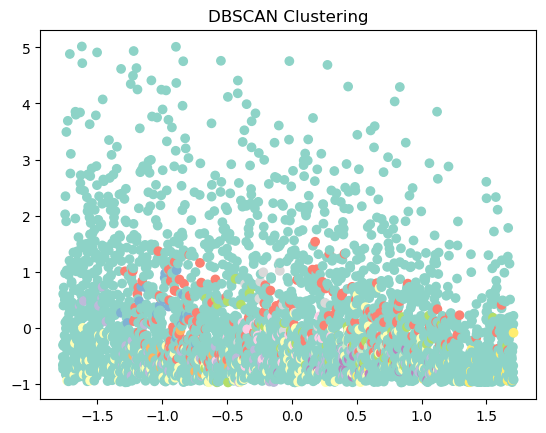

In [18]:
# 7. Visualizing Clusters
# KMeans
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='Set2')
plt.title("K-Means Clustering")
plt.show()

# Hierarchical
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hc_labels, cmap='Set1')
plt.title("Hierarchical Clustering")
plt.show()

# DBSCAN
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='Set3')
plt.title("DBSCAN Clustering")
plt.show()

In [19]:
#8. Cluster Interpretation
# Append cluster labels to original data for interpretation
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hc_labels
df['DBSCAN_Cluster'] = dbscan_labels

# Describe each cluster
for cluster in df['KMeans_Cluster'].unique():
    print(f"\nKMeans Cluster {cluster} Summary:")
    print(df[df['KMeans_Cluster'] == cluster].describe())


KMeans Cluster 0 Summary:
               ID#        Balance   Qual_miles    cc1_miles  cc2_miles  \
count  2196.000000    2196.000000  2196.000000  2196.000000     2196.0   
mean   2331.734973   36542.100638    27.233151     1.186248        1.0   
std    1126.387174   38283.225558   208.415548     0.509063        0.0   
min       1.000000      50.000000     0.000000     1.000000        1.0   
25%    1433.750000   11764.250000     0.000000     1.000000        1.0   
50%    2478.500000   24704.500000     0.000000     1.000000        1.0   
75%    3324.250000   46989.250000     0.000000     1.000000        1.0   
max    4021.000000  330644.000000  2433.000000     3.000000        1.0   

       cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count     2196.0   2196.000000  2196.000000        2196.000000   
mean         1.0   3970.405282     6.167122          96.213115   
std          0.0   5656.225257     6.269631         248.027346   
min          1.0      0.000000     0.00000

In [ ]:
#Summary & Insights
#In your final report or notebook, include:

#The number of clusters found by each method.

#Silhouette scores comparison.

#Strengths and weaknesses (e.g., DBSCAN handles noise well, KMeans is efficient but assumes spherical clusters).

#Key characteristics of each cluster based on mean values or distributions.